In [ ]:
import pandas as pd
import numpy as np

#Вариант-18
df = pd.read_excel('LAB_DATA_MSM.xlsx', sheet_name = 'Показатели')

selected_columns = df[['Y2', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X12', 'X13']]

X = np.array(selected_columns[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X12', 'X13']].values.tolist())
Y = np.array(selected_columns['Y2'].tolist())
n = 10
k = len(Y)
names =['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X12', 'X13']
dff = pd.DataFrame(X, range(0,k), np.array(names).T)
dff.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X12,X13
0,0.23,0.78,0.40,1.37,1.23,0.23,1.45,26006.0,166.32,10.08
1,0.24,0.75,0.26,1.49,1.04,0.39,1.30,23935.0,92.88,14.76
2,0.19,0.68,0.40,1.44,1.80,0.43,1.37,22589.0,158.04,6.48
3,0.17,0.70,0.50,1.42,0.43,0.18,1.65,21220.0,93.96,21.96
4,0.23,0.62,0.40,1.35,0.88,0.15,1.91,7394.0,173.88,11.88


In [ ]:
def std(x):
  return np.sqrt(np.mean((x -np.mean(x))**2))
transpose_X = X.T.copy()
for i in range(n):#нормировка данных, так как значения сильно отличаются
  stdd = std(transpose_X[i])
  transpose_X[i] =(transpose_X[i]-np.mean(transpose_X[i]))/stdd

A = 1/k*transpose_X @ transpose_X.T #выборочная матрица ковариаций
df = pd.DataFrame(A, names, names)
df



,X1,X2,X3,X4,X5,X6,X7,X8,X12,X13
X1,1.000000,-0.322016,-0.494718,-0.354853,-0.278022,-0.048171,0.043781,-0.527331,0.521098,0.335787
X2,-0.322016,1.000000,-0.068742,0.414677,0.265658,0.362721,-0.016616,0.192146,-0.563417,-0.094535
X3,-0.494718,-0.068742,1.000000,-0.218592,-0.195779,-0.366717,0.433303,0.233366,-0.120555,-0.022866
X4,-0.354853,0.414677,-0.218592,1.000000,0.425040,0.270482,-0.206144,0.223530,-0.320228,-0.225827
X5,-0.278022,0.265658,-0.195779,0.425040,1.000000,0.087441,-0.088513,0.348864,-0.253080,-0.340150
X6,-0.048171,0.362721,-0.366717,0.270482,0.087441,1.000000,-0.281593,-0.022752,-0.354537,-0.002620
X7,0.043781,-0.016616,0.433303,-0.206144,-0.088513,-0.281593,1.000000,-0.102679,0.000925,0.267510
X8,-0.527331,0.192146,0.233366,0.223530,0.348864,-0.022752,-0.102679,1.000000,-0.211922,-0.263362
X12,0.521098,-0.563417,-0.120555,-0.320228,-0.253080,-0.354537,0.000925,-0.211922,1.000000,0.204477
X13,0.335787,-0.094535,-0.022866,-0.225827,-0.340150,-0.002620,0.267510,-0.263362,0.204477,1.000000


In [ ]:
#Находим собственные значения и собственные векторы матрицы Грама
eig_val, eig_vec = np.linalg.eig(A)
eig_vec_normalized = [vec/np.sqrt(sum(i**2 for i in vec)) for vec in eig_vec.T]

sorted_eig = dict(sorted(zip(eig_val, eig_vec_normalized), key = lambda x: x[0], reverse = True))
eig_val_sorted = np.array(list(sorted_eig.keys()))
eig_vec_sorted = np.array(list(sorted_eig.values()))

print("\nСобственные значения (упорядоченные по убыванию):")
for i, val in enumerate(eig_val_sorted, 1):
    print(f"λ{i}: {val}")
eig_vec_sorted.shape



Собственные значения (упорядоченные по убыванию):
λ1: 3.0789055552125775
λ2: 1.9778444259972934
λ3: 1.3340845237787702
λ4: 0.9087469766554488
λ5: 0.7145604267435923
λ6: 0.5889080962051902
λ7: 0.48486544292313244
λ8: 0.4220975056005238
λ9: 0.31616635263303383
λ10: 0.173820694250441


(10, 10)

In [ ]:
np.array(eig_vec_normalized)[0,:].T@np.array(eig_vec_normalized)[0,:]

np.float64(1.0000000000000002)

In [ ]:
def new_components(X, eig_vec):
    Y = X.T @ eig_vec
    return Y

Etta_components = new_components(transpose_X, eig_vec_sorted.T)
all_etta_components = Etta_components


In [ ]:
#Вычисление дисперсий новых компонент

component_variances = Etta_components.var(axis=0)
component_variances_sum = sum(component_variances)

#  Проверка через собственные значения
print("1. СРАВНЕНИЕ С СОБСТВЕННЫМИ ЗНАЧЕНИЯМИ:")
print("Компонента | Дисперсия Y | Доля объясненной дисперсии| Собств. значение")
print("-" * 80)
for i in range(len(component_variances)):
    print(f"PC{i+1:2}       | {component_variances[i]:11.7f} | {component_variances[i]/component_variances_sum:11.6f}               | {eig_val_sorted[i]:14.6f} ")

1. СРАВНЕНИЕ С СОБСТВЕННЫМИ ЗНАЧЕНИЯМИ:
Компонента | Дисперсия Y | Доля объясненной дисперсии| Собств. значение
--------------------------------------------------------------------------------
PC 1       |   3.0789056 |    0.307891               |       3.078906 
PC 2       |   1.9778444 |    0.197784               |       1.977844 
PC 3       |   1.3340845 |    0.133408               |       1.334085 
PC 4       |   0.9087470 |    0.090875               |       0.908747 
PC 5       |   0.7145604 |    0.071456               |       0.714560 
PC 6       |   0.5889081 |    0.058891               |       0.588908 
PC 7       |   0.4848654 |    0.048487               |       0.484865 
PC 8       |   0.4220975 |    0.042210               |       0.422098 
PC 9       |   0.3161664 |    0.031617               |       0.316166 
PC10       |   0.1738207 |    0.017382               |       0.173821 


In [ ]:
l = component_variances[0]
for i in range(1,len(component_variances)):
  l+=component_variances[i]
  print(f'Доля объясненной дисперсии для {i+1} компонент: {l/component_variances_sum:.6f}')


Доля объясненной дисперсии для 2 компонент: 0.505675
Доля объясненной дисперсии для 3 компонент: 0.639083
Доля объясненной дисперсии для 4 компонент: 0.729958
Доля объясненной дисперсии для 5 компонент: 0.801414
Доля объясненной дисперсии для 6 компонент: 0.860305
Доля объясненной дисперсии для 7 компонент: 0.908792
Доля объясненной дисперсии для 8 компонент: 0.951001
Доля объясненной дисперсии для 9 компонент: 0.982618
Доля объясненной дисперсии для 10 компонент: 1.000000


In [ ]:
#Определим количество значимых компонент
#1.По доли выделенной суммарной дисперсии
variance_ratio = eig_val_sorted / np.sum(eig_val_sorted)
cumulative = np.cumsum(variance_ratio)#Куммулятивная сумма

for threshold in [0.7, 0.8, 0.9]:
    num_comp = np.argmax(cumulative >= threshold) + 1
    print(f"{threshold*100}% дисперсии: {num_comp} компонент")

# 2. Критерий КАЙЗЕРА (λ >= 1)
kaiser_num = np.sum(eig_val_sorted >= 1)
print(f"Критерий Кайзера: {kaiser_num} компонент(ы)")

70.0% дисперсии: 4 компонент
80.0% дисперсии: 5 компонент
90.0% дисперсии: 7 компонент
Критерий Кайзера: 3 компонент(ы)


,lambdas,x
0,3.078906,1
1,1.977844,2
2,1.334085,3
3,0.908747,4
4,0.714560,5
5,0.588908,6
6,0.484865,7
7,0.422098,8
8,0.316166,9
9,0.173821,10


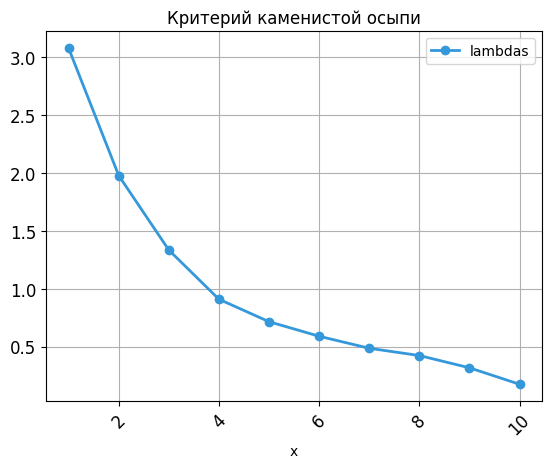

In [ ]:
#Критерий каменистой осыпи
df = pd.DataFrame({'lambdas':eig_val_sorted, 'x': range(1,11)})
df.plot(x = 'x', y = 'lambdas', title='Критерий каменистой осыпи',
grid=True,
color='#3498db',
style='-o',
linewidth=2,
fontsize=12,
legend=True,
rot=45 )#место на графике, где убывание собственных значений слева направо максимально замедляется
df



In [ ]:
#Критерий сломанной трости
def L_i(i, k):
  return sum(1/j for j in range(i,k))/k
count = 0
k = 10
for i in range(1, k+1):
  if eig_val_sorted[i-1]/np.sum(eig_val_sorted)>= L_i(i,k):
    count+=1
print(f'Критерий сломанной трости: {count} значимых компонент')


Критерий сломанной трости: 8 значимых компонент


In [ ]:
k = 4  # количество значимых компонент(признаков), новые признаки

# Берем первые k СТОЛБЦОВ собственных векторов
signif_eig_vec = eig_vec_sorted[:, :k]  #столбцы - собственные векторы

def new_components(X, eig_vec):#матрица значений главных компонент
    Y = X.T @ eig_vec
    return Y

Etta_components = new_components(transpose_X, signif_eig_vec)


component_names = [f'PC{i+1}' for i in range(k)]

Etta_df = pd.DataFrame(Etta_components, columns=component_names)
print(f"\nРазмерность новых компонент: {Etta_df.shape}")
Etta_df.head()



Размерность новых компонент: (53, 4)


,PC1,PC2,PC3,PC4
0,0.971997,-0.974882,-1.457949,-0.211351
1,0.341944,-0.258876,0.501824,-0.461710
2,-0.496054,-1.511897,-0.412462,-0.523466
3,1.573174,-0.585558,1.493689,-1.214710
4,0.119058,-0.809417,0.381760,-1.423834


In [ ]:
for i in range(k):
    coefs = signif_eig_vec[:, i]  # коэффициенты i-й компоненты
    expression = " + ".join([f"{coef:.3f}*{names[j]}" for j, coef in enumerate(coefs)])
    print(f"PC{i+1} = {expression}")

# ОЦЕНКИ ЗНАЧЕНИЙ PC
print(f"\nОценки {k} главных компонент для всех наблюдений:")
print(Etta_df.shape)  # (53, 4) - 53 наблюдения, 4 компоненты
print(Etta_df.head())

PC1 = -0.409*X1 + 0.369*X2 + -0.014*X3 + -0.231*X4 + -0.089*X5 + -0.213*X6 + 0.199*X7 + 0.194*X8 + 0.274*X12 + 0.662*X13
PC2 = 0.378*X1 + 0.084*X2 + -0.422*X3 + -0.118*X4 + -0.037*X5 + -0.041*X6 + 0.702*X7 + 0.184*X8 + -0.358*X12 + 0.001*X13
PC3 = 0.004*X1 + -0.648*X2 + -0.109*X3 + 0.194*X4 + -0.028*X5 + 0.118*X6 + -0.129*X7 + 0.040*X8 + -0.326*X12 + 0.625*X13
PC4 = 0.387*X1 + 0.182*X2 + 0.022*X3 + -0.292*X4 + 0.123*X5 + 0.752*X6 + -0.166*X7 + 0.202*X8 + 0.202*X12 + 0.202*X13

Оценки 4 главных компонент для всех наблюдений:
(53, 4)
        PC1       PC2       PC3       PC4
0  0.971997 -0.974882 -1.457949 -0.211351
1  0.341944 -0.258876  0.501824 -0.461710
2 -0.496054 -1.511897 -0.412462 -0.523466
3  1.573174 -0.585558  1.493689 -1.214710
4  0.119058 -0.809417  0.381760 -1.423834


In [ ]:
#РАСЧЕТ ВКЛАДА ПРИЗНАКОВ

# 1. Квадраты нагрузок = вклад в дисперсию PC
squared_loadings = signif_eig_vec ** 2

# 2. Нормируем на 100% для каждой PC
contribution = squared_loadings / np.sum(squared_loadings, axis=0) * 100

# 3. Находим топ-признаки для каждой PC
print("НАИБОЛЬШИЙ ВКЛАД ПРИЗНАКОВ:")
for i in range(k):
    # Сортируем по вкладу
    indices = np.argsort(contribution[:, i])[::-1]

    print(f"\nPC{i+1}:")
    total = 0
    for j, idx in enumerate(indices):
        contrib = contribution[idx, i]
        total += contrib
        print(f"  {names[idx]}: {contrib:.1f}%")
        if total > 70:  # остановка на 70% объясненной дисперсии
            break

НАИБОЛЬШИЙ ВКЛАД ПРИЗНАКОВ:

PC1:
  X13: 43.8%
  X1: 16.7%
  X2: 13.6%

PC2:
  X7: 49.3%
  X3: 17.8%
  X1: 14.3%

PC3:
  X2: 42.0%
  X13: 39.1%

PC4:
  X6: 56.6%
  X1: 15.0%


In [ ]:
from scipy import stats

def regression_model(Etta_components, Y):
  # Сравним модели множественной регрессии
  X_new = np.column_stack((np.ones(53), Etta_components))
  B = np.linalg.inv(X_new.T @ X_new) @ X_new.T @ Y
  Y_pred_model = X_new @ B
  errors_ = Y_pred_model - Y

  n, k = X_new.shape

  S_squared = 1/(n - k-1) * sum(errors_**2)
  print(f"S² = {S_squared}")

  var = S_squared * np.linalg.inv(X_new.T @ X_new)
  def t_j(B, var, j):
    return B[j]/np.sqrt(var[j,j])

  t_critical = stats.t.ppf(0.975, df = n-k-1)
  for i in range(k):
    if np.abs(t_j(B, var, i)) > t_critical:
      print(f'{i+1}: Коэффициент {B[i]} значим')
    else:
      print(f'{i+1}: Коэффициент {B[i]} не значим')
  R2 = 1 - sum(errors_**2) / sum((Y - np.mean(Y))**2)
  print(f"R² = {R2:.4f}")

regression_model(Etta_components, Y)


S² = 12755.005518002448
1: Коэффициент 113.19452830188692 значим
2: Коэффициент 26.67745154230633 не значим
3: Коэффициент -44.13666235308945 значим
4: Коэффициент -28.455238082911887 не значим
5: Коэффициент -7.078115594039607 не значим
R² = 0.1569


In [ ]:
regression_model(all_etta_components, Y)


S² = 986.4191408890492
1: Коэффициент 113.1945283018868 значим
2: Коэффициент 43.71779709812322 значим
3: Коэффициент -30.29987660023639 значим
4: Коэффициент 30.78600897037859 значим
5: Коэффициент 2.18547146865721 не значим
6: Коэффициент 66.20112208661656 значим
7: Коэффициент -18.47344103354435 значим
8: Коэффициент 6.782206215027993 не значим
9: Коэффициент 11.489963298701879 не значим
10: Коэффициент 26.817754040653508 значим
11: Коэффициент 16.27288158009285 не значим
R² = 0.9431
